# Principal Component Analysis

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

Simon Shaw
<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

## What this is about:

- **Principal Component Analysis**, or PCA. What it is, mathemtically and in code.
- How it works, with examples.
- The connection between SVD, the **Singular Value Decomposition**, and PCA.

As usual our emphasis will be on *doing* rather than *proving*:
*just enough: progress at pace*


## Assigned Reading

For this worksheet you are recommended Chapters 4 and 10 of [MML],
Chapter 10 of [MLFCES], Chapter 5.3 of [IPDS], 

- MML: Mathematics for Machine Learning, by Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong.
  Cambridge University Press. <https://mml-book.github.io>.
- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm,
  Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. 
  <http://smlbook.org>.
- IPDS: Introduction to Probability for Data Science, by Stanley H. Chan,
  <https://probability4datascience.com>

These can be accessed legally and without cost.

There are also these useful references for coding:

- PT: `python`: <https://docs.python.org/3/tutorial>
- NP: `numpy`: <https://numpy.org/doc/stable/user/quickstart.html>
- MPL: `matplotlib`: <https://matplotlib.org>

## Review


We have seen these 

- Eigenvalue decomposition
- SVD, the **Singular Value Decomposition**

Let's review them...

## Eigen-systems of Symmetric Matrices

Given a real square $n$-row by $n$-column matrix,
$\boldsymbol{A}\in\mathbb{R}^{n\times n}$ the eigenvalue problem
is that of finding scalar eigenvalues $\lambda$
and $n$-dimensional eigenvectors $\boldsymbol{v}$ such that

$$
\boldsymbol{A}\boldsymbol{v}=\lambda\boldsymbol{v}    
\quad\Longrightarrow\quad
\boldsymbol{A}\boldsymbol{V}=\boldsymbol{V}\boldsymbol{D}  
\quad\Longrightarrow\quad
\boldsymbol{A} = 
\sum_{k=1}^n
\lambda_k\boldsymbol{v}_k\boldsymbol{v}_k^T.
$$

The eigensystem is **real**.

We have the *Spectral Theorem* - see [MML, Theorem 4.15]

> **Spectral Theorem (for matrices)**
> If $\boldsymbol{A}$ is real and symmetric then its eigenvalues are
> all real and its eigenvector matrix $\boldsymbol{V}$ can be taken
> as *orthogonal* so that $\boldsymbol{V}^{-1}=\boldsymbol{V}^T$.
Hence...

$$
\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T  
$$


## The SVD: Singular Value Decomposition

Given a real $m$-row by $n$-column matrix, 
$\boldsymbol{B}\in\mathbb{R}^{m\times n}$

$$
\boldsymbol{B} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
=\sum_{j=1}^{p} \sigma_j \boldsymbol{u}_j\boldsymbol{v}_j^T
$$

where: for the left singular vectors: $\boldsymbol{U}\in\mathbb{R}^{m\times m}$;
for the singular values: $\boldsymbol{\Sigma}\in\mathbb{R}^{m\times n}$;
and, for the right singular vectors, $\boldsymbol{V}\in\mathbb{R}^{n\times n}$.
Here $p=\min\{m,n\}$.

Note that $\boldsymbol{\Sigma}=\text{diag}(\sigma_1,\ldots,\sigma_p) + \mathit{zeros}$,
and we can always arrange that $0 \le \sigma_1\le\cdots\le\sigma_p$.

As $\boldsymbol{B}$ is real,
$\boldsymbol{U}$ and $\boldsymbol{V}$ are real and *orthogonal*.

If $\sigma_r\ne 0$ and $\sigma_p= 0$ for all $p>r$ then
$r$ is the rank of $\boldsymbol{B}$.



## How are these factorizations connected?

On the face of it they are very different. the first applies only to 
square symmetric matrices, while the second applies also to
rectangular, and hence (why?) non-symmetric matrices.

But... Look at this... Given the SVD 
$\boldsymbol{B} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$
we have,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \Big(\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\Big)^T
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
$$

and remembering that, in general,
$(\boldsymbol{K}\boldsymbol{L})^T = \boldsymbol{L}^T\boldsymbol{K}^T$
(this could called *taking the transpose through*), we can write,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
$$
because $\boldsymbol{U}^T\boldsymbol{U}=\boldsymbol{I}$ (orthogonal).

Similarly, because also
$\boldsymbol{V}^T\boldsymbol{V}=\boldsymbol{I}$ (orthogonal),

$$
\boldsymbol{B}\boldsymbol{B}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
\Big(\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T\Big)^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
\boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{U}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}
\boldsymbol{\Sigma}^T\boldsymbol{U}^T.
$$

Do you recognise these?

We have just shown that,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
\qquad\text{ and }\qquad
\boldsymbol{B}\boldsymbol{B}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}
\boldsymbol{\Sigma}^T\boldsymbol{U}^T.
$$

Familiar? Think about $\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T$.

- Put $\boldsymbol{A} = \boldsymbol{B}^T\boldsymbol{B}$ (symmetric) and 
$\boldsymbol{D} = \boldsymbol{\Sigma}^T\boldsymbol{\Sigma}$. Then,

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
\qquad\text{becomes}\qquad
\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T.
$$

- Put $\boldsymbol{A} = \boldsymbol{B}\boldsymbol{B}^T$ (symmetric) and 
$\boldsymbol{D} = \boldsymbol{\Sigma}\boldsymbol{\Sigma}^T$. Then,

$$
\boldsymbol{B}\boldsymbol{B}^T
= 
\boldsymbol{U}\boldsymbol{\Sigma}
\boldsymbol{\Sigma}^T\boldsymbol{U}^T
\qquad\text{becomes}\qquad
\boldsymbol{A}=\boldsymbol{U}\boldsymbol{D}\boldsymbol{U}^T.
$$

- $\boldsymbol{V}$, the right singular vectors in the SVD are the eigenvectors of 
$\boldsymbol{B}^T\boldsymbol{B}$.

- $\boldsymbol{U}$, the left singular vectors in the SVD are the eigenvectors of 
$\boldsymbol{B}\boldsymbol{B}^T$.

- In both cases $\boldsymbol{\Sigma}$ contains the positive square
roots of the eigenvalues of $\boldsymbol{B}^T\boldsymbol{B}$
and $\boldsymbol{B}\boldsymbol{B}^T$.

- **NOTE:** $\boldsymbol{B}^T\boldsymbol{B}$ and $\boldsymbol{B}\boldsymbol{B}^T$
have the same non-zero eigenvalues (same rank).


## Why does this matter?
 
Our data, $\boldsymbol{X}$, is organized into rows of feature values with one observation per row 
and one feature per column. We write this as

$$
\boldsymbol{X} = \Big(
\boldsymbol{X}_0, \boldsymbol{X}_1, \cdots, \boldsymbol{X}_D
\Big)
$$

If $D=3$ (four features)...

... we recall that the **covariance matrix** takes this form:

$$
\boldsymbol{S} = 
\left(\begin{array}{llll}
\mathrm{Var}(X_0)  &  \mathrm{Cov}(X_0,X_1)  &  \mathrm{Cov}(X_0,X_2)  &  \mathrm{Cov}(X_0,X_3) \\
\mathrm{Cov}(X_1,X_0)  &  \mathrm{Var}(X_1)  &  \mathrm{Cov}(X_1,X_2)  &  \mathrm{Cov}(X_1,X_3) \\
\mathrm{Cov}(X_2,X_0)  &  \mathrm{Cov}(X_2,X_1)  &  \mathrm{Var}(X_2)  &  \mathrm{Cov}(X_2,X_3) \\
\mathrm{Cov}(X_3,X_0)  &  \mathrm{Cov}(X_3,X_1)  &  \mathrm{Cov}(X_3,X_2)  &  \mathrm{Var}(X_3) \\
\end{array}\right)
$$

because $\mathrm{Cov}(X,X)=\mathrm{Var}(X)$. Since $\mathrm{Cov}(X,Y)=\mathrm{Cov}(Y,X)$, this matrix is **symmetric**
and so has real eigenvalues.

We have seen that if the data are already centred then,

$$
(N-1)\boldsymbol{S} = 
\left(\begin{array}{llll}
\boldsymbol{X}_0\cdot\boldsymbol{X}_0 & \boldsymbol{X}_0\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_0\cdot\boldsymbol{X}_2 & \boldsymbol{X}_0\cdot\boldsymbol{X}_3
\\
\boldsymbol{X}_1\cdot\boldsymbol{X}_0 & \boldsymbol{X}_1\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_1\cdot\boldsymbol{X}_2 & \boldsymbol{X}_1\cdot\boldsymbol{X}_3
\\
\boldsymbol{X}_2\cdot\boldsymbol{X}_0 & \boldsymbol{X}_2\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_2\cdot\boldsymbol{X}_2 & \boldsymbol{X}_2\cdot\boldsymbol{X}_3
\\
\boldsymbol{X}_3\cdot\boldsymbol{X}_0 & \boldsymbol{X}_3\cdot\boldsymbol{X}_1 &
\boldsymbol{X}_3\cdot\boldsymbol{X}_2 & \boldsymbol{X}_3\cdot\boldsymbol{X}_3
\\
\end{array}\right)
=
\left(\begin{array}{l}
\boldsymbol{X}_0^T
\\
\boldsymbol{X}_1^T
\\
\boldsymbol{X}_2^T
\\
\boldsymbol{X}_3^T
\\
\end{array}\right)
\left(\begin{array}{llll}
\boldsymbol{X}_0
&
\boldsymbol{X}_1
&
\boldsymbol{X}_2
&
\boldsymbol{X}_3
\\
\end{array}\right)
$$

and, hence (in general), the (sample) covariance matrix for $N$ observations is

$$
\boldsymbol{S} = 
\frac{1}{(N-1)}\boldsymbol{X}^T\boldsymbol{X}.
$$


## Terminology

We just introduced the **sample** covariance matrix:

$$
\boldsymbol{S} = 
\frac{1}{(N-1)}\boldsymbol{X}^T\boldsymbol{X}.
$$

The $N-1$ in the denominator makes this an **unbiased** estimate of the 
population statistics. When $N$ is large we can just work with 

$$
\boldsymbol{S} = 
\frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}.
$$

and call it the **empirical** covariance matrix.

This terminology is discussed in [MML, Section 6.4.2]. 


## Conventions

We have now adopted a convention that our data matrix $\boldsymbol{X}$ has 
features varying along the rows, and observations varying down the columns
so that:

$$
\boldsymbol{X} = \Big(
\boldsymbol{X}_0, \boldsymbol{X}_1, \cdots, \boldsymbol{X}_D
\Big)
$$

gives a data set with $D$ features. The length (they must all be the same)
of the column vectors 
$\boldsymbol{X}_1,\ \boldsymbol{X}_2,\ \ldots,\ \boldsymbol{X}_D$
tell us how many observations there are. We've been denoting this
by $N$.

>**HOWEVER**: in some sources this convention is transposed. The different
features occupy their own rows of the matrix,
with the observations recorded along the rows. 

This is the case in [MML]. It means that

$$
\boldsymbol{S} = 
\frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}
\qquad\text{for us, becomes}\qquad
\boldsymbol{S} = 
\frac{1}{N}\boldsymbol{X}\boldsymbol{X}^T
\qquad\text{for them}
$$

because our $\boldsymbol{X}$ is their $\boldsymbol{X}^T$.

**BE CAREFUL: this is not uncommon**

## Features and Observations

Let's say there are $D$ features (columns) in our data set
$\boldsymbol{X}$ and $N$ observations (rows).

An observation takes the form $\boldsymbol{x}_j = (x_1, x_2, \ldots, x_d)^T$,
a **column vector**, for $j=1,2,\ldots,N$.

Hence,

$$
\boldsymbol{X}
= \Big(
\boldsymbol{X}_0, \boldsymbol{X}_1, \cdots, \boldsymbol{X}_D
\Big)
= \Big(
\boldsymbol{x}_0, \boldsymbol{x}_1, \cdots, \boldsymbol{x}_N
\Big)^T
$$

Note: we are using **upper case** $\boldsymbol{X}$ for a column
vector of observations of a feature, and **lower case**,
$\boldsymbol{x}$, for a feature vector arising from a single
observation. 

We only use column vectors in these notes.



## PCA - Principal Component Analysis

The main idea and motivation behind this is that high dimensional data
often lives very close to a lower dimensional subspace.

A typical and often used example of this is that in Figure 10.1 of [MML, Chap. 10].

We can see that here: <https://mml-book.github.io>.

PCA will analyze a data set and determine the direction in which
most variation occurs. If we are to approximate using a lower dimesional space
then this is a good direction (subspace component) to start with.

Technically, PCA determines directions which maximize variance.

Let's go through this slowly - it can be quite confusing.

## PCA - outline algorithm.

- Take our $D$-column by $N$-row data set $\boldsymbol{X}$
and ensure that the column means are zero.

- This is referred to as **centering the data**.

- It means that $\mathbb{E}(\boldsymbol{X}_d)=0$ for
columns $d=1,2,\ldots,D$.

- We want a $M$-row by $N$ column matrix
$\boldsymbol{B}\in\mathbb{R}^{M,N}$, called the **code**, so that 

$$
\boldsymbol{Z} = \boldsymbol{X}\boldsymbol{B}\boldsymbol{B}^T
$$

- If $M=D$ we want $\boldsymbol{Z}=\boldsymbol{X}$. Otherwise
we have $M<D$ and $\boldsymbol{Z}$ is a low dimensional
approximation of $\boldsymbol{X}$.

- We determine $\boldsymbol{B}$ by minimizing the reconstruction
error:

$$
\mathscr{J} = \frac{1}{N}\sum_{n=1}^N
\Vert\boldsymbol{x}_n-\boldsymbol{z}_n\Vert_2^2
$$

where $\boldsymbol{z}_n$ is the $n$-th row of $\boldsymbol{Z}$.

# CHECK THIS for B 


This minimization is a long technical excursion in multivariate calculus. 
The important result of it is that we need to find the eigensystem of 
the empirical data covariance matrix,

$$
\boldsymbol{S} = 
\frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}.
$$

This means we want to solve

$$
\boldsymbol{S}\boldsymbol{v} = \lambda\boldsymbol{v}
$$

for the eigenpairs
$(\lambda_1, \boldsymbol{v}_1),\ (\lambda_2, \boldsymbol{v}_2),\ \ldots$

Then $\boldsymbol{Z} = (\boldsymbol{v}_1, \boldsymbol{v}_2, \ldots, \boldsymbol{v}_M)$
and the eigenvalues tell us how much variance of the original data set is captured
by the $M$-dimensional projection.

## Worked example

Consider this set of data (already centered),

$$
\boldsymbol{X} = \left(\begin{array}{rr}
1 & 2 \\ 2 & 1 \\ -2 & -1 \\ -1 & -2
\end{array}\right)
\quad\Longrightarrow\quad
\boldsymbol{S}
= \frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}
= \frac{1}{4}\left(\begin{array}{rr}
10 & 8 \\ 8 & 10
\end{array}\right)
$$

The eigensystem,
with $\boldsymbol{S}\boldsymbol{V} = \boldsymbol{V}\boldsymbol{D}$,
is 

$$
\boldsymbol{V} = \frac{1}{\sqrt{2}}
\left(\begin{array}{rr}
1 & -1 \\ 1 & 1
\end{array}\right)
=
\left(\begin{array}{rr}
\boldsymbol{v}_0 & \boldsymbol{v}_1
\end{array}\right)
\quad\text{ and }\quad
\boldsymbol{D}
=
\frac{1}{2}\left(\begin{array}{rr}
9 & 0 \\ 0 & 1
\end{array}\right)
=
\left(\begin{array}{rr}
\lambda_0 & 0 \\ 0 & \lambda_1
\end{array}\right).
$$

Let's see this in python...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# set up the feature matrix and check the column means are zero
D=2; N=4
X = np.array([[1, 2], [2, 1], [-2, -1], [-1, -2]])
print(f'Column means: col 1, {X[:,0].mean()} and col 2, {X[:,0].mean()}')
# and the empirical covariance matrix
S = 1/N*X.T @ X
print('X = \n',X)
print('S = \n',S)
# solve the eigenvalue problem
lmda, V = np.linalg.eig(S)
print('evals = ', lmda)
print('evecs = ', V)

Column means: col 1, 0.0 and col 2, 0.0
X = 
 [[ 1  2]
 [ 2  1]
 [-2 -1]
 [-1 -2]]
S = 
 [[2.5 2. ]
 [2.  2.5]]
evals =  [4.5 0.5]
evecs =  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


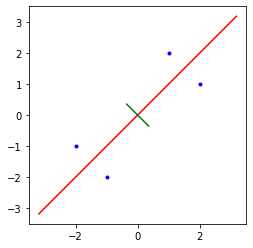

In [2]:
# a picture will tell us much more...
plt.figure(figsize=(4,4)); plt.gca().set_aspect('equal')
# plot the data in blue
plt.plot(X[:,0], X[:,1], '.', color='b')
# plot the eigenvectors...
# the first in red from -v0 to +v0 with length 2*lambda_0
x0 = lmda[0]*V[0,[0]]; y0 = lmda[0]*V[1,[0]]
plt.plot([-x0,x0],[-y0,y0],'-', color='r')
# the second in green from -v1 to +v1 with length 2*lambda_1
x1 = lmda[1]*V[0,[1]]; y1 = lmda[1]*V[1,[1]]
plt.plot([-x1,x1],[-y1,y1],'-', color='g')

We see that the direction of maximum variance is given by the
dominant eigenpair. The next eigenpair is **orthogonal**.


Now, we know that $\boldsymbol{V}$ is an orthogonal matrix, so that
$\boldsymbol{V}\boldsymbol{V}^T = \boldsymbol{I}$.

It is therefore clear that 
$\boldsymbol{X}=\boldsymbol{X}\boldsymbol{V}\boldsymbol{V}^T$.
Now, with $\boldsymbol{V}=(\boldsymbol{v}_0, \boldsymbol{v}_1)$,
we observe that

$$
\boldsymbol{Z}_0
=\boldsymbol{X}\boldsymbol{v}_0\boldsymbol{v}_0^T
= \frac{3}{2}\left(\begin{array}{rr}
1 & 1 \\ 1 & 1 \\ -1 & -1 \\ -1 & -1
\end{array}\right)
\quad\text{and}\quad
\boldsymbol{Z}_1
=\boldsymbol{X}\boldsymbol{v}_1\boldsymbol{v}_1^T
= \frac{1}{2}\left(\begin{array}{rr}
-1 & 1 \\ 1 & -1 \\ -1 & 1 \\ 1 & -1
\end{array}\right)
$$

The rows give us the projections of the original rows (features)
onto the lower dimensional subspaces.

Let's see it in code, and then in pictures (building on the picture above)...

In [3]:
print('X - X V V.T = \n', X - X @ V @ V.T )

v0 = V[:,[0]]; Z0 = X @ v0 @ v0.T
print('X @ v0 @ v0.T = \n', Z0)

v1 = V[:,[1]]; Z1 = X @ v1 @ v1.T
print('X @ v1 @ v1.T = \n', Z1)

X - X V V.T = 
 [[ 1.11022302e-16  2.22044605e-16]
 [ 4.44089210e-16  2.22044605e-16]
 [-4.44089210e-16 -2.22044605e-16]
 [-1.11022302e-16 -2.22044605e-16]]
X @ v0 @ v0.T = 
 [[ 1.5  1.5]
 [ 1.5  1.5]
 [-1.5 -1.5]
 [-1.5 -1.5]]
X @ v1 @ v1.T = 
 [[-0.5  0.5]
 [ 0.5 -0.5]
 [-0.5  0.5]
 [ 0.5 -0.5]]


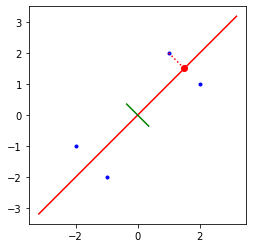

In [4]:
plt.figure(figsize=(4,4)); plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
plt.plot([-x0,x0],[-y0,y0],'-', color='r')
plt.plot([-x1,x1],[-y1,y1],'-', color='g')
# just the first row of Z0 for the moment
plt.plot([X[0,0], Z0[0,0]], [X[0,1], Z0[1,1]], ':', marker='o', color='r', markevery=[1])

In the first row of $\boldsymbol{Z}_0 =\boldsymbol{X}\boldsymbol{v}_0\boldsymbol{v}_0^T$,
the original point at $(1,2)$ is projected to the new point $(1.5,1.5)$
on the dominant lower dimensional subspace. What about 
$\boldsymbol{Z}_1 =\boldsymbol{X}\boldsymbol{v}_1\boldsymbol{v}_1^T$?

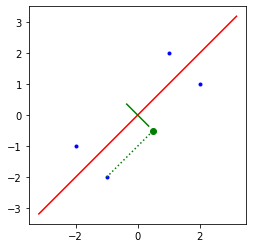

In [5]:
plt.figure(figsize=(4,4)); plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
plt.plot([-x0,x0],[-y0,y0],'-', color='r')
plt.plot([-x1,x1],[-y1,y1],'-', color='g')
# just the last row of Z1 for the moment
plt.plot([X[3,0], Z1[3,0]], [X[3,1], Z1[3,1]], ':', marker='o', color='g', markevery=[1])

Now in the last row of $\boldsymbol{Z}_1 =\boldsymbol{X}\boldsymbol{v}_1\boldsymbol{v}_1^T$,
the original point at $(-1,-2)$ is projected to the new point $(0.5,-0.5)$
on the next-dominant lower dimensional subspace.

Let's see all the projections in one picture

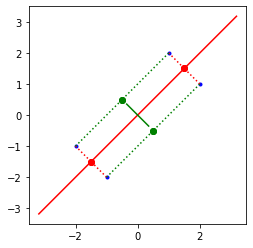

In [6]:
plt.figure(figsize=(4,4)); plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
plt.plot([-x0,x0],[-y0,y0],'-', color='r')
plt.plot([-x1,x1],[-y1,y1],'-', color='g')
for k in range(4):
  plt.plot([X[k,0], Z0[k,0]], [X[k,1], Z0[k,1]], ':', marker='o', color='r', markevery=[1])
  plt.plot([X[k,0], Z1[k,0]], [X[k,1], Z1[k,1]], ':', marker='o', color='g', markevery=[1])

## The Local Coordinate System

If we treat the eigenvectors as subspaces then the length along each eigenvector is the local coordinate in that subspace. How can we get these coordinates? Well, look at this:

$$
\boldsymbol{X} = \left(\begin{array}{rr}
1 & 2 \\ 2 & 1 \\ -2 & -1 \\ -1 & -2
\end{array}\right)
\quad\Longrightarrow\quad
\boldsymbol{X}\boldsymbol{v}_0
=\frac{1}{\sqrt{2}}\left(\begin{array}{r} 3 \\ 3 \\ -3 \\ -3 \end{array}\right)
\quad\text{and}\quad
\boldsymbol{X}\boldsymbol{v}_1
=\frac{1}{\sqrt{2}}\left(\begin{array}{r} 1 \\ -1 \\ 1 \\ -1 \end{array}\right)
$$

These tell us that the first two point (rows) in $\boldsymbol{X}$ 
project to coincident points a distance $\frac{3}{\sqrt{2}}$ along
the dominant eigenvector, and that the second two points 
project to coincident points a distance $\frac{-3}{\sqrt{2}}$ along
the dominant eigenvector.

On the other hand, the first and third points project to distances 
$\frac{1}{\sqrt{2}}$ along the second eigenvector, while the second
and fourth project to distances $\frac{-1}{\sqrt{2}}$.

Here is some code to illustrate this...

In [7]:
Xv0 = X @ v0
Xv1 = X @ v1
# multiply by root 2 to tidy up the output
print('X v0 = \n', np.sqrt(2) * Xv0)
print('X v1 = \n', np.sqrt(2) * Xv1)

X v0 = 
 [[ 3.]
 [ 3.]
 [-3.]
 [-3.]]
X v1 = 
 [[ 1.]
 [-1.]
 [ 1.]
 [-1.]]


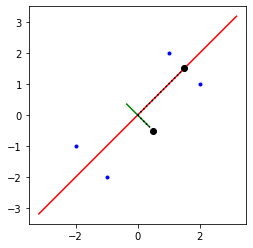

In [8]:
plt.figure(figsize=(4,4)); plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
plt.plot([-x0,x0],[-y0,y0],'-', color='r')
plt.plot([-x1,x1],[-y1,y1],'-', color='g')
cos45 = sin45 = 1/np.sqrt(2)
# for data point 0 along v0
plt.plot([0, Xv0[0,0]*cos45], [0, Xv0[0,0]*sin45], ':', marker='o', color='k', markevery=[1])
# for data point 3 along v1
plt.plot([0, -Xv1[3,0]*cos45], [0, Xv1[3,0]*sin45], ':', marker='o', color='k', markevery=[1])

## Explained Variance

There is yet more to see... The column-wise variances in the orignal data set,

$$
\boldsymbol{X} = \left(\begin{array}{rr}
1 & 2 \\ 2 & 1 \\ -2 & -1 \\ -1 & -2
\end{array}\right)
$$

are 

$$
\left\{\begin{array}{rrrr}
\mathrm{Var}(\boldsymbol{X}_0)
& = \mathbb{E}(\boldsymbol{X}_0\cdot\boldsymbol{X}_0)
& = \frac{1}{4}\big(1+2^2+(-2)^2+1\big) & = \frac{5}{2},
\\
\mathrm{Var}(\boldsymbol{X}_1)
& = \mathbb{E}(\boldsymbol{X}_1\cdot\boldsymbol{X}_1)
& = \frac{1}{4}\big(2^2+1+1+(-2)^2\big) & = \frac{5}{2}
\end{array}\right.
$$

and the total variance in the data set is $\frac{5}{2}+\frac{5}{2}=5$.

$$
\text{we had:}\quad
\left\{\begin{array}{rrl}
\mathrm{Var}(\boldsymbol{X}_0)
& = \mathbb{E}(\boldsymbol{X}_0\cdot\boldsymbol{X}_0)
& = \frac{5}{2},
\\
\mathrm{Var}(\boldsymbol{X}_1)
& = \mathbb{E}(\boldsymbol{X}_1\cdot\boldsymbol{X}_1)
& = \frac{5}{2}
\end{array}\right.
$$

with total variance $\frac{5}{2}+\frac{5}{2}=5$.

Each eigenvalue gives the variance in the direction of its eigenvector.

Our eigenvalues were $\lambda_0 = \frac{9}{2}$ and $\lambda_1 = \frac{1}{2}$. The
total variance is therefore $\frac{9}{2}+\frac{1}{2}=5$.

We talk about each eigenvalue **explaining** variance in the original data set.

Here the first eigenvalue explains $\frac{9}{2}\div 5 =90\%$ of the 
original variance. The remaining $5\%$ is in the orthogonal direction
of the second eigenvector.

## The connection to SVD

We just performed PCA using an eigenvalue analysis of the empirical
covariance matrix

$$
\boldsymbol{S} = 
\frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}
\quad\text{leading to}\quad
\frac{1}{N}\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{v}
=\lambda\boldsymbol{v}.
$$

Earlier, given the SVD 
$\boldsymbol{B} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$,
we saw that putting
$\boldsymbol{A} = \boldsymbol{B}^T\boldsymbol{B}$ (symmetric) and 
$\boldsymbol{D} = \boldsymbol{\Sigma}^T\boldsymbol{\Sigma}$ gave us

$$
\boldsymbol{B}^T\boldsymbol{B}
= \boldsymbol{V}\boldsymbol{\Sigma}^T\boldsymbol{\Sigma}\boldsymbol{V}^T
\qquad\text{becomes}\qquad
\boldsymbol{A}=\boldsymbol{V}\boldsymbol{D}\boldsymbol{V}^T.
$$

Therefore, for PCA we could also obtain the SVD of $\boldsymbol{X}$ and
use the right singular vectors. The eigenvalues will be the squares of
the singular values divided by $N$.

Let's check this:

In [9]:
# re-solve the eigenvalue problem
lmda, V = np.linalg.eig(S)
print(f'evals = {lmda} and V = ')
print(V)
# take the SVD of X
U, Sig, VT = np.linalg.svd(X)
print(f'singular values S = {S}')
print(f'S^2/N = {S*S/N} and V = ')
print(VT.T)

evals = [4.5 0.5] and V = 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
singular values S = [[2.5 2. ]
 [2.  2.5]]
S^2/N = [[1.5625 1.    ]
 [1.     1.5625]] and V = 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Let's see how to do PCA with `sklearn`...

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print('Here is the explained variance as ratios...')
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'Here are the singular values = {pca.singular_values_}')
print('the eigenvalues are squares of the singular values divided by N')
print(f'eigenvalues = {pca.singular_values_**2/N}')
# the principal components are stored as row vectors, so transpose
B = pca.components_.T
print('Principal Components (transposed) B = \n', B)
print('Compare with our earlier V = \n', V)

Here is the explained variance as ratios...
XV ratio = [0.9 0.1]
Here are the singular values = [4.24264069 1.41421356]
the eigenvalues are squares of the singular values divided by N
eigenvalues = [4.5 0.5]
Principal Components (transposed) B = 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Compare with our earlier V = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## Review

That was a long journey - and we didn't even derive the results, we just quoted
and illustrated them. This, again, is because we are doing *just enough*
to make *progress at pace*.

We're now going to embark on a much more realistic (well, in 2D at least)
example of hoew this works. We'll go faster because all the work has been done.

## Standard Example

The idea is to generate and plot a lozenge of Gaussian distributed data.
It will have unequal variances (otherwise it would be a circle). 

In [11]:
# generate this number of sample points
Ns=50  
# The Gaussian lozenge will be centered with non-unit covariance
mean = [0, 0]
cov = [[30, 15], [15, 15]]
# generate Ns random points (x,y)
x, y = np.random.multivariate_normal(mean, cov, Ns).T
# reshape them to columns and stack them next to each other 
X = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))
# We can see it if the data matrix is small - otherwise little point
if Ns < 8: print(X)

In [12]:
# let's look at the empirical column means - they wont be exactly zero 
print(f'Column means 1, {X[:,0].mean()} and 2, {X[:,1].mean()}')
# so let's center this sample data
X[:,0] -= X[:,0].mean()
X[:,1] -= X[:,1].mean()
print(f'Centered column means 1, {X[:,0].mean()} and 2, {X[:,1].mean()}')

Column means 1, -0.22910372166834198 and 2, -0.449539042308063
Centered column means 1, -3.9968028886505634e-17 and 2, 2.2204460492503132e-17


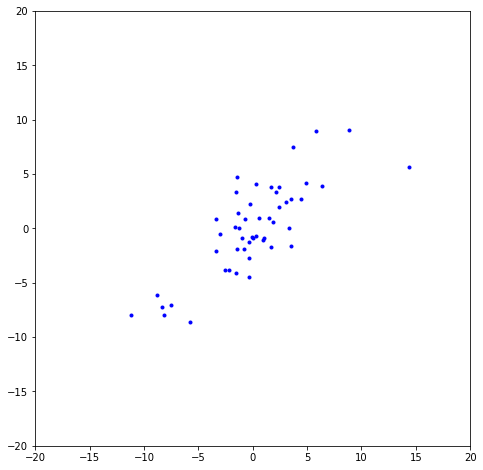

In [13]:
# let's plot our data set
plt.figure(figsize=(8,8))
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')

In [14]:
# perform the PCA
pca = PCA(n_components=2)
pca.fit(X)
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'sing vals = {pca.singular_values_}')
# the component are stored as row vectors, so transpose
V = pca.components_.T
print('V = \n', V)

XV ratio = [0.90120051 0.09879949]
sing vals = [40.6071307  13.44525171]
V = 
 [[ 0.73843008  0.67433005]
 [ 0.67433005 -0.73843008]]


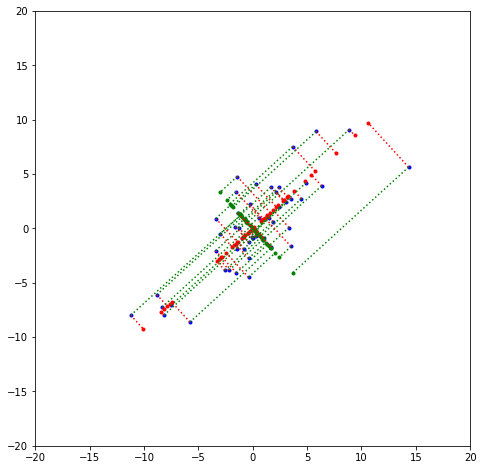

In [15]:
# re-plot, and include all the projected data
plt.figure(figsize=(8,8))
plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
# project X to the singular components
Z1 = X @ V[:,[0]] @ V[:,[0]].T
Z2 = X @ V[:,[1]] @ V[:,[1]].T
# plot the projections - these illustrate the directions
plt.plot(Z1[:,0], Z1[:,1], '.', color='r')
plt.plot(Z2[:,0], Z2[:,1], '.', color='g')
# Now loop over each point and dot the projection onto v0 and v1
for k in range(Ns):
  plt.plot([X[k,0], Z1[k,0]], [X[k,1],Z1[k,1]], ':', color='r')
  plt.plot([X[k,0], Z2[k,0]], [X[k,1],Z2[k,1]], ':', color='g')

window=20; plt.xlim(-window,window); plt.ylim(-window,window)
plt.show()

# I N C O M P L E T E

There is more to come - this document will be replaced with an update in due course.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
dfp = sns.load_dataset('penguins')
dfp2 = dfp.dropna()
dfp2.isna().sum()
dfp2 = dfp2.reset_index(drop=True)
print(dfp2.shape)

# create our labelled training and test data sets with 60/40 train/test split
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
# scale the data
scaler = StandardScaler()
# mean zero, unit variance 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(333, 7)


In [18]:
# take the SVD of X_train - we must treat X_test as 'unseen'
U, S, VT = np.linalg.svd(X_train, full_matrices=False) # full_matrices=False - discussed later

print(S)
print(S*S)
print(VT.T)

[23.1186343  12.81107709  8.69088878  4.67691181]
[534.47125192 164.12369622  75.53154774  21.87350411]
[[ 0.45308531  0.59202619 -0.64088588  0.18298628]
 [-0.38400355  0.80366414  0.42437482 -0.16300686]
 [ 0.58418042  0.01352134  0.20100359 -0.78622387]
 [ 0.55316202  0.05870363  0.60726341  0.56727138]]


Now look at the covariance matrix of X_train


In [19]:
N = X_train.shape[0]
C = X_train.T @ X_train / (N-1)
print(C)
w, v = np.linalg.eig(C)
print(w*(N-1))
print(w)
print(v)

[[ 1.00505051 -0.18231041  0.65607404  0.56834821]
 [-0.18231041  1.00505051 -0.54983254 -0.44618639]
 [ 0.65607404 -0.54983254  1.00505051  0.87023562]
 [ 0.56834821 -0.44618639  0.87023562  1.00505051]]
[534.47125192 164.12369622  75.53154774  21.87350411]
[2.69934976 0.82890756 0.38147246 0.11047224]
[[ 0.45308531 -0.59202619 -0.64088588  0.18298628]
 [-0.38400355 -0.80366414  0.42437482 -0.16300686]
 [ 0.58418042 -0.01352134  0.20100359 -0.78622387]
 [ 0.55316202 -0.05870363  0.60726341  0.56727138]]


In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)

[0.6714463  0.20618555 0.09488888 0.02747928]
[23.1186343  12.81107709  8.69088878  4.67691181]
[[ 0.45308531 -0.38400355  0.58418042  0.55316202]
 [ 0.59202619  0.80366414  0.01352134  0.05870363]
 [ 0.64088588 -0.42437482 -0.20100359 -0.60726341]
 [ 0.18298628 -0.16300686 -0.78622387  0.56727138]]


## Standard Example

Plot lozenge of Gaussian data

In [21]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
# decide number of samples, they will have zero mean
Ns = 50
mean = [0, 0]
cov = [[30, 15], [15, 15]] 
w,v = np.linalg.eig(cov)
print(w,'\n',v)
x, y = np.random.multivariate_normal(mean, cov, Ns).T


[39.27050983  5.72949017] 
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


In [22]:
# remove the mean - can't assume this
print(f'(before) mean of x = {x.mean()}')
print(f'(before) mean of y = {y.mean()}')
x -= x.mean()
y -= y.mean()
print(f'(after)  mean of x = {x.mean()}')
print(f'(after)  mean of y = {y.mean()}')

(before) mean of x = 0.2848735454881663
(before) mean of y = 0.2861347249476117
(after)  mean of x = 4.263256414560601e-16
(after)  mean of y = -3.552713678800501e-17


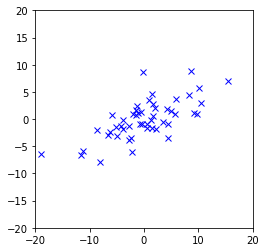

In [23]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'x', color='b')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.gca().set_aspect('equal')
plt.show()

In [24]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
X = np.hstack((x,y))
Cv = X.T @ X / (Ns-1)
print(Cv)
w,V = np.linalg.eig(Cv)
print('w = ', w)
print('V = \n', V)

[[40.21808147 16.3043276 ]
 [16.3043276  13.2953304 ]]
w =  [47.90002001  5.61339187]
V = 
 [[ 0.90461951 -0.42622006]
 [ 0.42622006  0.90461951]]


In [25]:
U,S,VT = np.linalg.svd(X)
print(f'S   = {S}')
print(f'S*S = {S*S}')
print(f'S*S/(Ns-1) = {S*S/(Ns-1)}')
print(f'S*S/(Ns-0) = {S*S/(Ns-0)}')
print(f'V = \n{VT.T}')



S   = [48.44688824 16.58481841]
S*S = [2347.10098039  275.05620153]
S*S/(Ns-1) = [47.90002001  5.61339187]
S*S/(Ns-0) = [46.94201961  5.50112403]
V = 
[[ 0.90461951  0.42622006]
 [ 0.42622006 -0.90461951]]


In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'sing vals = {pca.singular_values_}')
# the component are stored as row vectors
B = pca.components_.T
print('B = \n', B)
print(pca.components_.shape)

XV ratio = [0.89510308]
sing vals = [48.44688824]
B = 
 [[-0.90461951]
 [-0.42622006]]
(1, 2)


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'sing vals = {pca.singular_values_}')
# the component are stored as row vectors
B = pca.components_.T
print('B = \n', B)
print('B.T*B = \n', B.T@B)
Y1 = X @ B[:,[0]] @ B[:,[0]].T
Y2 = X @ B[:,[1]] @ B[:,[1]].T
print(Y1.shape)

XV ratio = [0.89510308 0.10489692]
sing vals = [48.44688824 16.58481841]
B = 
 [[-0.90461951 -0.42622006]
 [-0.42622006  0.90461951]]
B.T*B = 
 [[ 1.0000000e+00 -1.2830419e-17]
 [-1.2830419e-17  1.0000000e+00]]
(50, 2)


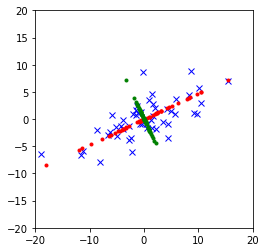

In [28]:
plt.plot(x, y, 'x', color='b')
plt.gca().set_aspect('equal')
plt.plot(Y1[:,0], Y1[:,1], '.', color='r')
plt.plot(Y2[:,0], Y2[:,1], '.', color='g')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.show()


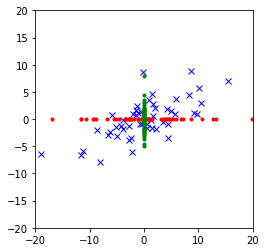

In [29]:
Z1 = X @ B[:,[0]]
Z2 = X @ B[:,[1]]
plt.plot(x, y, 'x', color='b')
plt.plot(Z1[:,0], 0*Z1[:,0], '.', color='r')
plt.plot(0*Z2[:,0], Z2[:,0], '.', color='g')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.gca().set_aspect('equal')
plt.show()



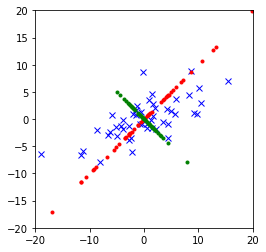

In [30]:
Z1 = X @ B[:,[0]]
Z2 = X @ B[:,[1]]
plt.plot(x, y, 'x', color='b')
plt.plot(Z1[:,0], Z1[:,0], '.', color='r')
plt.plot(Z2[:,0], -Z2[:,0], '.', color='g')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.gca().set_aspect('equal')
plt.show()

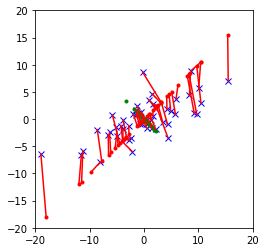

In [31]:
#Z1 = X @ B[:,[0]]
#Z2 = X @ B[:,[1]]
Z1 = X @ B[:,[0]] @ B[:,[0]].T
Z2 = X @ B[:,[1]] @ B[:,[1]].T
plt.plot(x, y, 'x', color='b')
plt.plot(Z1[:,0], Z1[:,0], '.', color='r')
plt.plot(Z2[:,0], -Z2[:,0], '.', color='g')
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.gca().set_aspect('equal')

for k in range(X.shape[0]):
  plt.plot([X[k,0], Z1[k,0]], [X[k,1], Z1[k,0]], '-', color='r')

plt.show()


# FRESH START - Simple Example


[[ 2  1]
 [ 1  2]
 [-2 -1]
 [-1 -2]]
Column means 1, 0.0 and 2, 0.0
XV ratio = [0.9 0.1]
sing vals = [4.24264069 1.41421356]
B = 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
(2, 2)
Shape of Z1 is (4, 2)
Shape of Z2 is (4, 2)


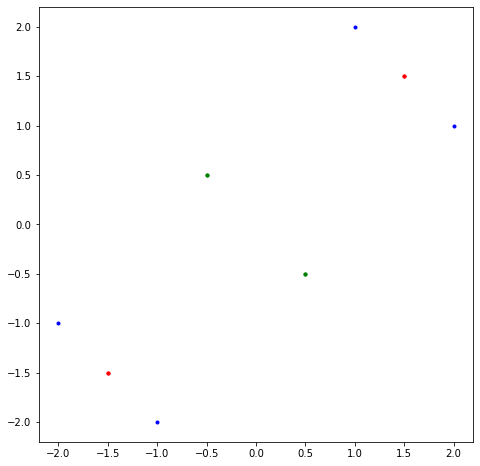

In [32]:
X = np.array([[2,1],[1,2],[-2,-1],[-1,-2]])
print(X)
print(f'Column means 1, {X[:,0].mean()} and 2, {X[:,0].mean()}')
plt.figure(figsize=(8,8))
plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
pca = PCA(n_components=2)
pca.fit(X)
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'sing vals = {pca.singular_values_}')
# the component are stored as row vectors, so transpose
B = pca.components_.T
print('B = \n', B)
print(pca.components_.shape)

#Z1 = X @ B[:,[0]]
#Z2 = X @ B[:,[1]]
Z1 = X @ B[:,[0]] @ B[:,[0]].T
Z2 = X @ B[:,[1]] @ B[:,[1]].T
print(f'Shape of Z1 is {Z1.shape}')
print(f'Shape of Z2 is {Z2.shape}')
plt.plot(Z1[:,0], Z1[:,1], '.', color='r')
plt.plot(Z2[:,0], Z2[:,1], '.', color='g')

Column means 1, -1.241913448008865 and 2, -1.241913448008865
XV ratio = [0.88714663 0.11285337]
sing vals = [44.93644238 16.02722162]
B = 
 [[-0.87387539  0.48614998]
 [-0.48614998 -0.87387539]]
(2, 2)
Shape of Z1 is (50, 2)
Shape of Z2 is (50, 2)


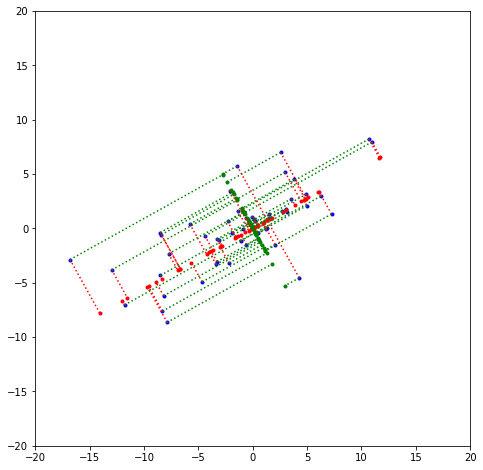

In [33]:
Ns=50
window = 30
#X = np.random.randn(Ns,2)
mean = [0, 0]
cov = [[30, 15], [15, 15]]
x, y = np.random.multivariate_normal(mean, cov, Ns).T
#x = x.reshape(-1,1)
#y = y.reshape(-1,1)
X = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))

if Ns < 5: print(X)
print(f'Column means 1, {X[:,0].mean()} and 2, {X[:,0].mean()}')
plt.figure(figsize=(8,8))
plt.gca().set_aspect('equal')
plt.plot(X[:,0], X[:,1], '.', color='b')
pca = PCA(n_components=2)
pca.fit(X)
print(f'XV ratio = {pca.explained_variance_ratio_}')
print(f'sing vals = {pca.singular_values_}')
# the component are stored as row vectors, so transpose
B = pca.components_.T
print('B = \n', B)
print(pca.components_.shape)

#Z1 = X @ B[:,[0]]
#Z2 = X @ B[:,[1]]
Z1 = X @ B[:,[0]] @ B[:,[0]].T
Z2 = X @ B[:,[1]] @ B[:,[1]].T
print(f'Shape of Z1 is {Z1.shape}')
print(f'Shape of Z2 is {Z2.shape}')
plt.plot(Z1[:,0], Z1[:,1], '.', color='r')
plt.plot(Z2[:,0], Z2[:,1], '.', color='g')

for k in range(Ns):
  plt.plot([X[k,0], Z1[k,0]], [X[k,1],Z1[k,1]], ':', color='r')
  plt.plot([X[k,0], Z2[k,0]], [X[k,1],Z2[k,1]], ':', color='g')


window=20; plt.xlim(-window,window); plt.ylim(-window,window)
plt.show()

ax1 = plt.subplot(131)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

# Here are those matlab notes...

```
K = [1 3; 2 5; 9 1]

K =

     1     3
     2     5
     9     1

[U, S, V] = svd(K)

U =

   -0.2043   -0.4757   -0.8556
   -0.3727   -0.7704    0.5173
   -0.9052    0.4246   -0.0199


S =

    9.7046         0
         0    5.1789
         0         0


V =

   -0.9373    0.3485
   -0.3485   -0.9373

S*V'

ans =

   -9.0963   -3.3816
    1.8046   -4.8543
         0         0

U*S*V'

ans =

    1.0000    3.0000
    2.0000    5.0000
    9.0000    1.0000

w = [ S(1,1)*U(1,1); S(2,2)*U(1,2)]

w =

   -1.9827
   -2.4635

V*w

ans =

    1.0000
    3.0000

W = U*S

W =

   -1.9827   -2.4635
   -3.6169   -3.9897
   -8.7844    2.1988

V*W

{Error using <a href="matlab:matlab.internal.language.introspective.errorDocCallback('mtimes')" style="font-weight:bold"> * </a>
Incorrect dimensions for matrix multiplication. Check that the number of columns in the first matrix matches the number of
rows in the second matrix. To perform elementwise multiplication, use '.*'.
}

W = S'*U'

W =

   -1.9827   -3.6169   -8.7844
   -2.4635   -3.9897    2.1988

W'*V'

ans =

    1.0000    3.0000
    2.0000    5.0000
    9.0000    1.0000

diary off

```

and 

```
K = [1 3; 2 5; 9 1]

K =

     1     3
     2     5
     9     1

[U, S, V] = svd(K)

U =

   -0.2043   -0.4757   -0.8556
   -0.3727   -0.7704    0.5173
   -0.9052    0.4246   -0.0199


S =

    9.7046         0
         0    5.1789
         0         0


V =

   -0.9373    0.3485
   -0.3485   -0.9373

S*V'

ans =

   -9.0963   -3.3816
    1.8046   -4.8543
         0         0

U*S*V'

ans =

    1.0000    3.0000
    2.0000    5.0000
    9.0000    1.0000

w = [ S(1,1)*U(1,1); S(2,2)*U(1,2)]

w =

   -1.9827
   -2.4635

V*w

ans =

    1.0000
    3.0000

W = U*S

W =

   -1.9827   -2.4635
   -3.6169   -3.9897
   -8.7844    2.1988

V*W

{Error using <a href="matlab:matlab.internal.language.introspective.errorDocCallback('mtimes')" style="font-weight:bold"> * </a>
Incorrect dimensions for matrix multiplication. Check that the number of columns in the first matrix matches the number of
rows in the second matrix. To perform elementwise multiplication, use '.*'.
}

W = S'*U'

W =

   -1.9827   -3.6169   -8.7844
   -2.4635   -3.9897    2.1988

W'*V'

ans =

    1.0000    3.0000
    2.0000    5.0000
    9.0000    1.0000

Kn = zeros(K)

{Error using <a href="matlab:matlab.internal.language.introspective.errorDocCallback('zeros')" style="font-weight:bold">zeros</a>
Size vector should be a row vector with real elements.
}

Kn = zeros(size(K))

Kn =

     0     0
     0     0
     0     0

Kn = zeros(size(K)); for n=1:2; Kn = Kn + S(n,n)*U(:,n)*V(:n)'; disp(Kn); end
 Kn = zeros(size(K)); for n=1:2; Kn = Kn + S(n,n)*U(:,n)*V(:n)'; disp(Kn); end
                                                            
{Error: Invalid expression. Check for missing multiplication operator, missing or unbalanced delimiters, or other syntax
error. To construct matrices, use brackets instead of parentheses.
}

Kn = zeros(size(K)); for n=1:2; Kn = Kn + S(n,n)*U(:,n)*V(:,n)'; disp(Kn); end
    1.8584    0.6909
    3.3902    1.2603
    8.2338    3.0610

    1.0000    3.0000
    2.0000    5.0000
    9.0000    1.0000

K

K =

     1     3
     2     5
     9     1

W = [S(1,1)*U(1,1); 0];
V*W

ans =

    1.8584
    0.6909

diary off

```

# THIS PART BELOW BELONGS SOMEWHERE ELSE

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
dfp = sns.load_dataset('penguins')
dfp2 = dfp.dropna()
dfp2.isna().sum()
dfp2 = dfp2.reset_index(drop=True)
print(dfp2.shape)

# create our labelled training and test data sets with 60/40 train/test split
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
# scale the data
scaler = StandardScaler()
# mean zero, unit variance 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# obtain the classifier and fit it using 2 nearest neighbours
# and the Manhattan norm
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(X_train, y_train)
# Now use the fitted model from the training data to predict
# from the test data.
y_pred = classifier.predict(X_test)

(333, 7)


In [37]:
# create a confusion matrix to assess the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(cm)
accsc = accuracy_score(y_test,y_pred);
print("Accuracy:", accsc)

Confusion Matrix:
[[56  0  0]
 [ 2 28  0]
 [ 0  0 48]]
Accuracy: 0.9850746268656716


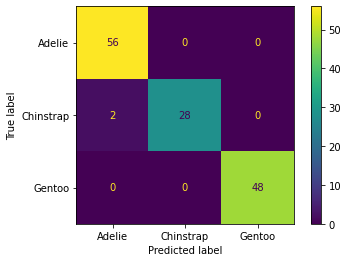

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmplot.plot()
plt.show()

### Problem!

In the SVD demo we took the SVD of `X`. But the test data should be *unseen*. 
Hence we cannot include it in our training phase.

Let's look at the SVD of the scaled training data. 

In [39]:
# Let's again do this with SVD - but this time for X_train
U, S, VT = np.linalg.svd(X_train, full_matrices=False)
print("allclose? (T/F): ", np.allclose(X_train, U @ np.diag(S) @ VT))

allclose? (T/F):  True


S =  [23.50189583 12.0236996   8.83429593  4.58767431]


<BarContainer object of 4 artists>

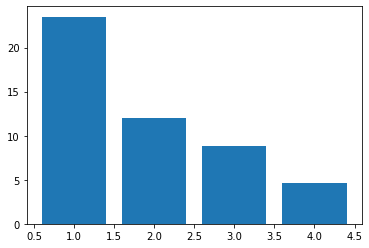

In [40]:
print("S = ", S)
plt.bar([1,2,3,4],S)

**Now things don't look so clear...**

Let's repeat our SVD experiment. We could try this...

In [41]:
accarray = np.zeros([4])
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
# scale the data
scaler = StandardScaler();
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# get the SVD of the training data. NOT the test data - WHY?
U, S, VT = np.linalg.svd(X_train, full_matrices=False)

In [42]:
Xc_train = np.zeros(X_train.shape)
nc = 1
for k in range(0, nc):
  Xc_train +=  S[k] * U[:,[k]] @ VT[[k],:]
print('nc = ', nc, ', ||X_train-Xc_train|| = ', np.linalg.norm(X_train - Xc_train))

# obtain classifier, fit using 2 NN's and the Manhattan norm
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(Xc_train, y_train)
# predict from the test data.
y_pred = classifier.predict(X_test)
# create a confusion matrix to assess the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(cm)
accsc = accuracy_score(y_test,y_pred); print("Accuracy:", accsc)
print('nc = ', nc, ', ||X-Xc|| = ', np.linalg.norm(X_train - Xc_train))
# store the accuracy scores in a python list for nc=1,2,3,4
accarray[nc-1] = accsc
print(type(cm), cm.shape)

nc =  1 , ||X_train-Xc_train|| =  15.392869351055493
Confusion Matrix:
[[55  4  0]
 [18  8  2]
 [ 0  6 41]]
Accuracy: 0.7761194029850746
nc =  1 , ||X-Xc|| =  15.392869351055493
<class 'numpy.ndarray'> (3, 3)


In [43]:
# create a confusion matrix to assess the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(cm)
accsc = accuracy_score(y_test,y_pred);
print("Accuracy:", accsc)

Confusion Matrix:
[[55  4  0]
 [18  8  2]
 [ 0  6 41]]
Accuracy: 0.7761194029850746


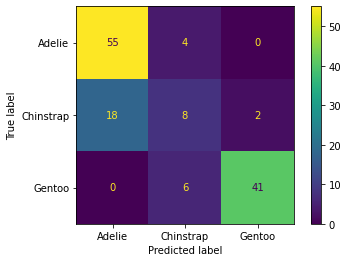

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmplot.plot()
plt.show()

Let's wrap this up in a loop

nc =  1 , ||X_train-Xc_train|| =  15.92925092730454
nc =  2 , ||X_train-Xc_train|| =  9.667024966315429
nc =  3 , ||X_train-Xc_train|| =  4.689399084848383
nc =  4 , ||X_train-Xc_train|| =  1.2660817406478619e-14
Confusion Matrix:
[[55.  5.  0.]
 [21.  6.  3.]
 [ 0.  0. 44.]]
nc =  4 , ||X-Xc|| =  1.2660817406478619e-14
Accuracy: 0.7835820895522388
Confusion Matrix:
[[54.  6.  0.]
 [19. 11.  0.]
 [ 0.  0. 44.]]
nc =  4 , ||X-Xc|| =  1.2660817406478619e-14
Accuracy: 0.8134328358208955
Confusion Matrix:
[[60.  0.  0.]
 [ 4. 26.  0.]
 [ 0.  0. 44.]]
nc =  4 , ||X-Xc|| =  1.2660817406478619e-14
Accuracy: 0.9701492537313433
Confusion Matrix:
[[60.  0.  0.]
 [ 3. 27.  0.]
 [ 0.  0. 44.]]
nc =  4 , ||X-Xc|| =  1.2660817406478619e-14
Accuracy: 0.9776119402985075
[0.78358209 0.81343284 0.97014925 0.97761194]


(0.0, 1.0)

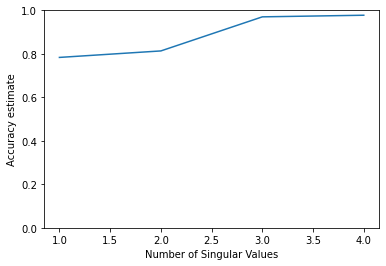

In [45]:
accarray = np.zeros([4])
cm_all = np.zeros([4,3,3])
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
# scale the data
scaler = StandardScaler();
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# get the SVD of the training data. NOT the test data - WHY?
U, S, VT = np.linalg.svd(X_train, full_matrices=False)

for k in range(4):
  Xc_train = np.zeros(X_train.shape)
  nc = 1+k
  for k in range(0, nc):
    Xc_train +=  S[k] * U[:,[k]] @ VT[[k],:]
  print('nc = ', nc, ', ||X_train-Xc_train|| = ', np.linalg.norm(X_train - Xc_train))

  # obtain classifier, fit using 2 NN's and the Manhattan norm
  classifier = KNeighborsClassifier(n_neighbors=2, p=1)
  classifier.fit(Xc_train, y_train)
  # predict from the test data.
  y_pred = classifier.predict(X_test)
  # create a confusion matrix to assess the performance
  cm_all[k,:,:] = confusion_matrix(y_test, y_pred)
  accarray[k] = accuracy_score(y_test,y_pred)


for k in range(4):
  print("Confusion Matrix:"); print(cm_all[k,:,:])
  print('nc = ', nc, ', ||X-Xc|| = ', np.linalg.norm(X_train - Xc_train))
  print("Accuracy:", accarray[k])

print(accarray)
plt.plot([1,2,3,4], accarray)
plt.xlabel('Number of Singular Values')
plt.ylabel('Accuracy estimate')
plt.ylim([0,1])

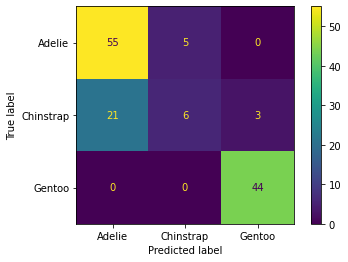

In [46]:
k=0
cmplot = ConfusionMatrixDisplay(cm_all[k,:,:], display_labels=classifier.classes_)
cmplot.plot()


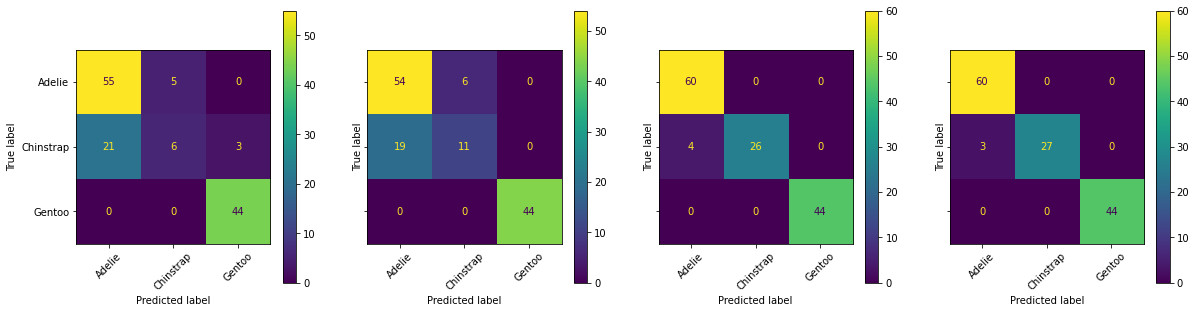

In [47]:
# subplot hints came from here:
# https://stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side

f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')
for k in range(4):
  cmplot = ConfusionMatrixDisplay(cm_all[k,:,:], display_labels=classifier.classes_)
  cmplot.plot(ax=axes[k], xticks_rotation=45)
plt.show()

### Review

We covered *just enough*, to make *progress at pace*. We looked at

- How the SVD and eigenvalue decomposition are related.
- How this becomes relevant to the data covariance matrix.
- How this can be used.

Now we can start putting all of this material to work.

## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides 10_pca.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

Some of this originated from

<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [48]:
%%bash
NBROOTNAME=10_pca
OUTPUTTING=1

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi

[NbConvertApp] Converting notebook 10_pca.ipynb to html
[NbConvertApp] Writing 848644 bytes to 10_pca.html
[NbConvertApp] Converting notebook 10_pca.ipynb to pdf
[NbConvertApp] Support files will be in 10_pca_files/
[NbConvertApp] Making directory ./10_pca_files
[NbConvertApp] Making directory ./10_pca_files
[NbConvertApp] Making directory ./10_pca_files
[NbConvertApp] Making directory ./10_pca_files
[NbConvertApp] Making directory ./10_pca_files
[NbConvertApp] Making directory ./10_pca_files
[NbConvertApp] Making directory ./10_pca_files
[NbConvertApp] Writing 140385 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 223100 bytes to 10_pca.pdf
[NbConvertApp] Converting notebook 10_pca.ipynb to scrip